In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

 ### Reading togo-dapaong_qc csv from data folder and putting it in df variable in memory

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [3]:
# df.describe() helps you understand the distribution, spread, and central tendency of your data at a glance.
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

##### Timestamp  is object need to change to datetime

In [4]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [5]:
# Convert index (strings) -> DatetimeIndex (coerce errors to NaT)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object

In [7]:
#getting sum of all null values for each columns
missing = df.isna().sum().sort_values(ascending=False)
missing

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [8]:
# calculating Missing percentage for each columns
missing_pct = (missing / len(df) * 100).round(2)
missing_pct

Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

In [9]:
# list columns >5% null
cols_over5 = missing_pct[missing_pct > 5].index.tolist()
print("Columns >5% missing:", cols_over5)

Columns >5% missing: ['Comments']


In [10]:
#removing Comments from the df. since it all value is null, no useful information for our analysis
df = df.drop(columns=['Comments'])


### Outlier Detection & Basic Cleaning

# 🧠 Reason for selecting those specific columns

We selected:
**["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]**

because these are the main continuous measurement variables in the dataset — the ones where outliers are **most likely to indicate sensor errors or extreme weather conditions**, rather than just normal variation.

---

## 🔍 1. Why these columns matter for data quality checks

These are all continuous sensor measurements.

Because they record physical quantities (solar radiation, wind speed, etc.), you can easily detect problems by:
1. Looking for **impossible or missing values** (like negative irradiance or 0 during midday).
2. Checking for **extreme spikes (outliers)** that break physical limits.
3. Comparing relationships (e.g., **DHI should not exceed GHI**).

In [13]:
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print(target_cols)

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [14]:
df[target_cols].describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      219.568588       2.368093       3.229490  
std       307.932510       1.462668       1.882565  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.400000       1.900000  
50%         4.300000       2.200000       2.900000  
75%       411.000000       3.200000       4.400000  
max      1367.000000      16.100000      23.100000

##  Check and clean missing values, outliers, incorrect entries

In [16]:
# Remove rows with negative values in GHI, DNI, or DHI
df = df[(df["GHI"] >= 0) & (df["DNI"] >= 0) & (df["DHI"] >= 0)]

In [17]:
df[target_cols].describe()

GHI            DNI            DHI           ModA  \
count  268215.000000  268215.000000  268215.000000  268215.000000   
mean      454.081218     296.409415     228.166180     443.109538   
std       319.096010     283.534417     150.064955     318.155810   
min         0.000000       0.000000       0.000000       0.000000   
25%       156.500000       7.000000     112.400000     144.200000   
50%       430.300000     233.800000     211.400000     410.800000   
75%       743.900000     548.000000     330.300000     733.400000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB             WS         WSgust  
count  268215.000000  268215.000000  268215.000000  
mean      430.224900       2.897560       3.951753  
std       308.539523       1.474324       1.850927  
min         0.000000       0.000000       0.000000  
25%       140.700000       1.900000       2.600000  
50%       399.800000       2.800000       3.900000  
75%       710.400000       3.800000       5.200000  
max      1367.000000      16.100000      22.900000

In [18]:
# since we don't have missing values for our target cols,  we do nothing to clean missing values
missing_counts = df[target_cols].isna().sum()
print(missing_counts)

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


#### outliers

## Boxplots show points outside the whiskers, usually considered outliers.

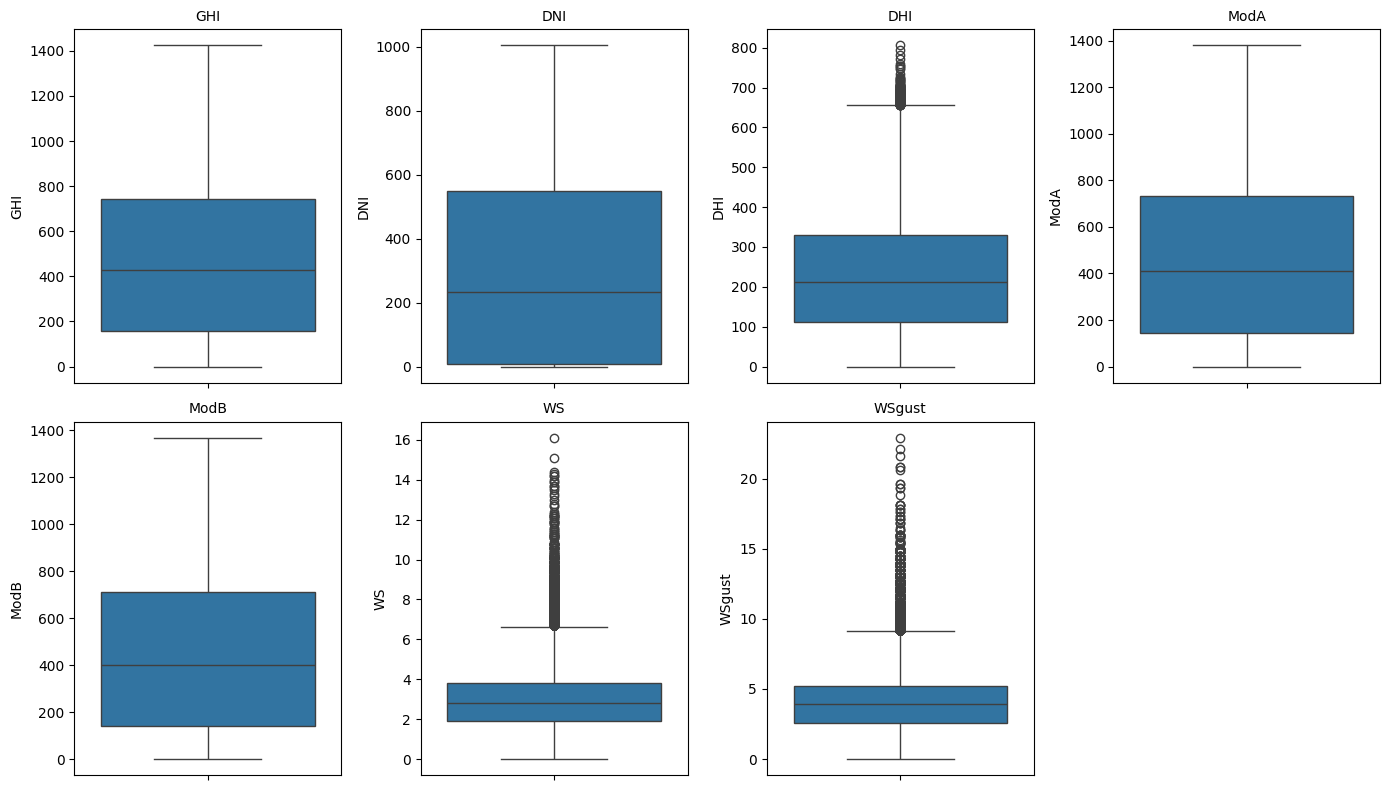

In [19]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

##### remove outliers

In [20]:
#remove outliers
# Compute z-scores for selected columns
z = np.abs(zscore(df[target_cols], nan_policy="omit"))

# Define a threshold (standard: 3 standard deviations)
threshold = 3
# 4️Keep only rows where all z-scores are below the threshold
df_no_outliers = df[(z < threshold).all(axis=1)]

# --- Remove physical outliers for wind ---
df_no_outliers = df_no_outliers[df_no_outliers["WSgust"] < 20]
df_no_outliers = df_no_outliers[df_no_outliers["WS"] < 15]

# --- Remove extreme statistical outliers for DHI ---
Q1 = df_no_outliers["DHI"].quantile(0.25)
Q3 = df_no_outliers["DHI"].quantile(0.75)
IQR = Q3 - Q1

# Keep rows within the IQR range (allow slightly lenient upper bound)
df_clean = df_no_outliers[(df_no_outliers["DHI"] >= Q1 - 1.5 * IQR) & (df_no_outliers["DHI"] <= Q3 + 3 * IQR)]

# Optional: see how many rows were removed
removed_count = len(df) - len(df_clean)
print(f"Removed {removed_count:,} outlier rows out of {len(df):,} total daytime rows.")

Removed 1,608 outlier rows out of 268,215 total daytime rows.


##### Export cleaned DataFrame to data/<country>_clean.csve


In [21]:
# Export cleaned DataFrame to data/<country>_clean.csve
df_clean.to_csv("../data/togo-dapaong_qc_clean.csv", index=False)

##### Boxplots after clean

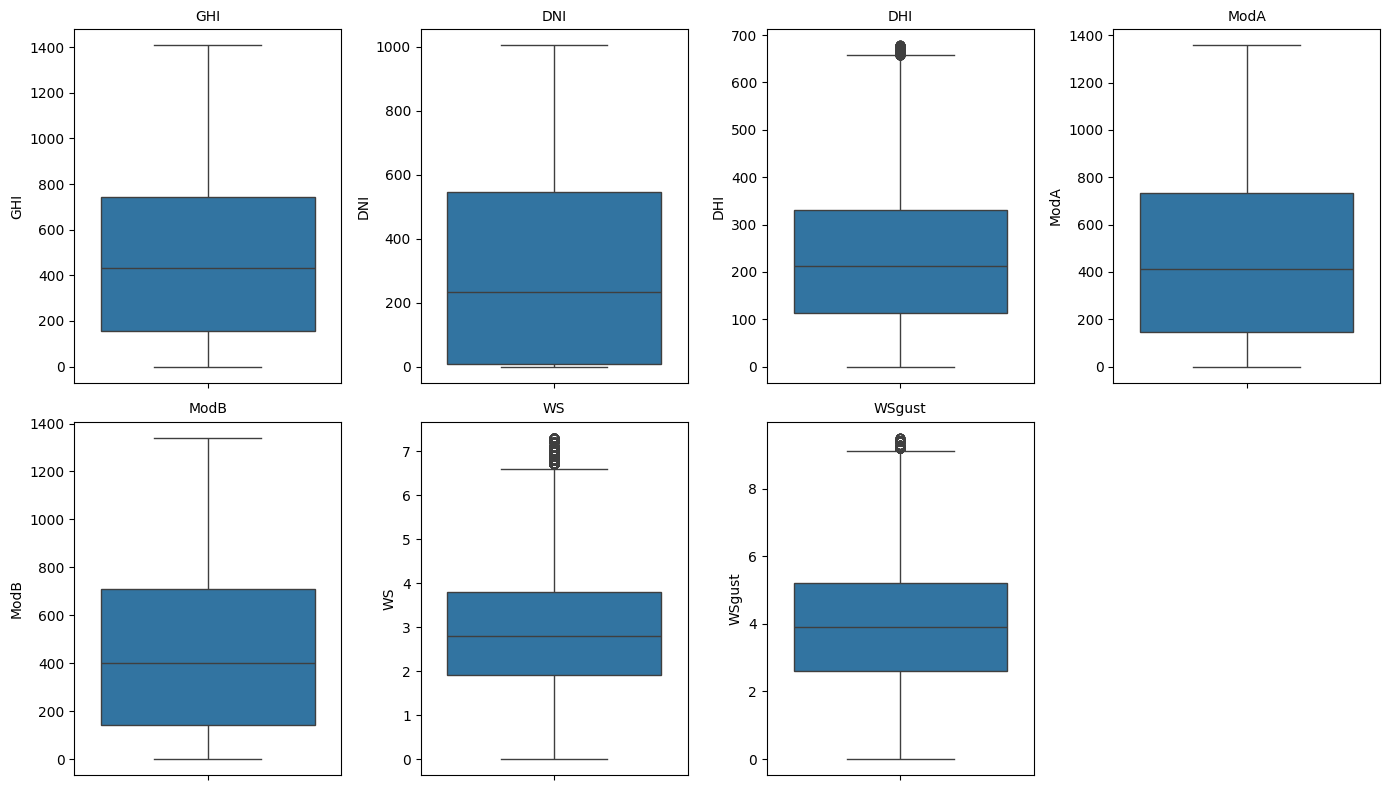

In [22]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

## Time Series Analysis

<Figure size 1600x800 with 0 Axes>

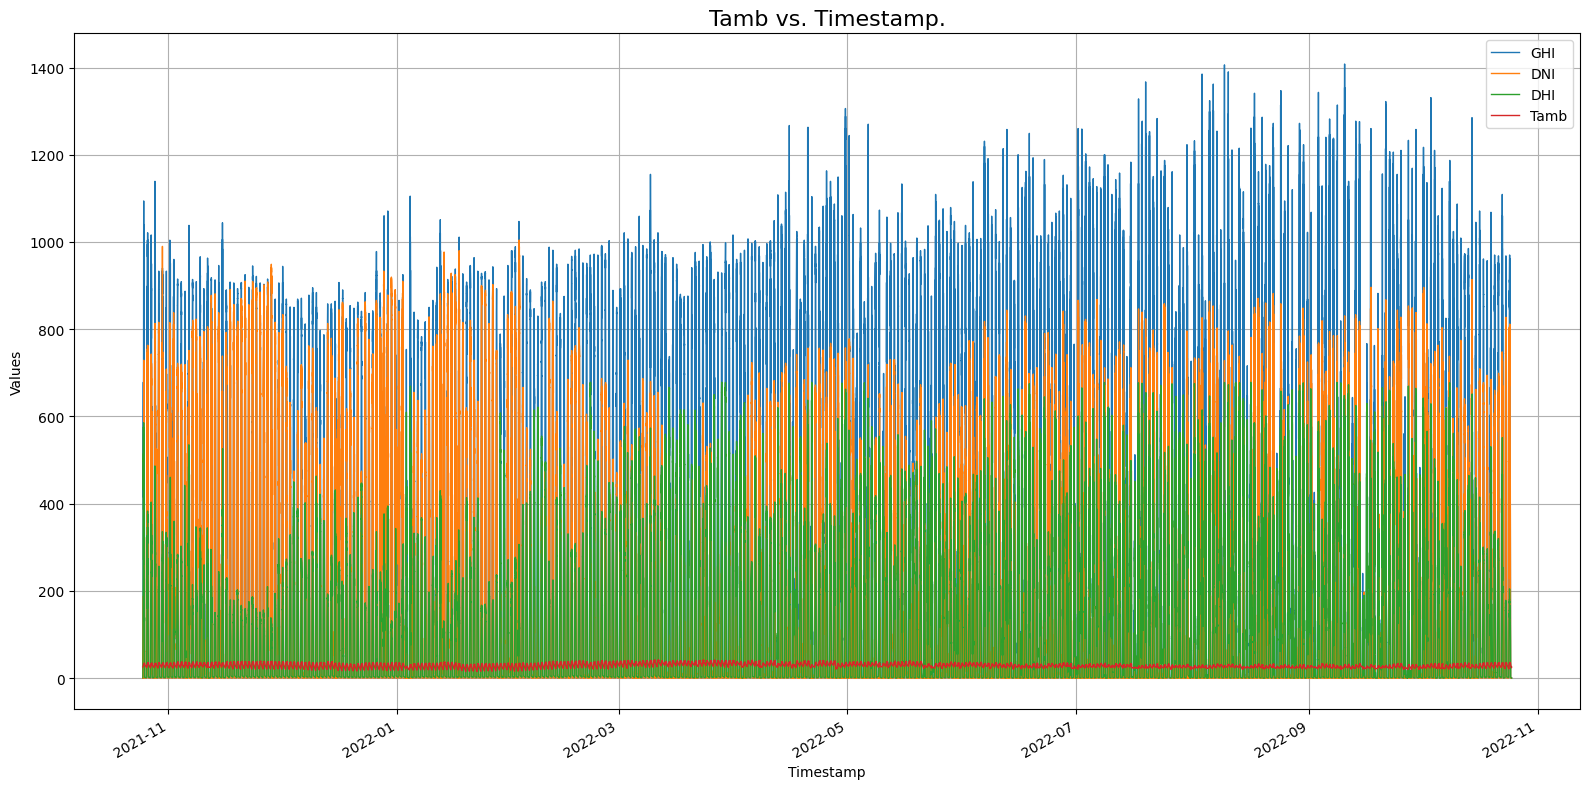

In [23]:
# Set as index (makes time series plotting easier)
df_clean = df_clean.copy()
df_clean.set_index('Timestamp', inplace=True)
# Create a multi-line plot
plt.figure(figsize=(16, 8))

# Plot each variable
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(16, 8), linewidth=1)

plt.title("Tamb vs. Timestamp.", fontsize=16)
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

##### Monthly patterns

C:\Users\hp\AppData\Local\Temp\ipykernel_16420\2161632642.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


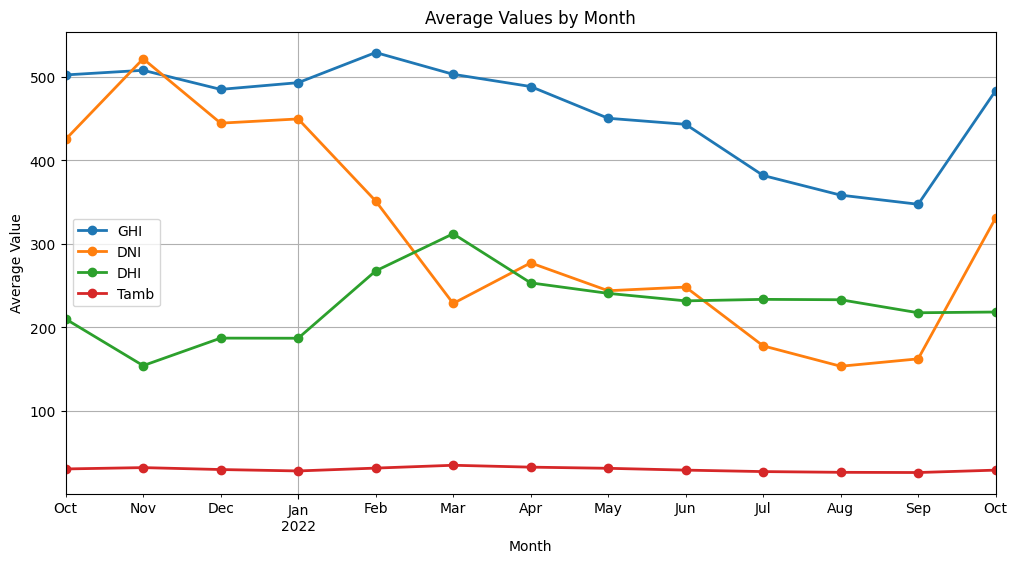

In [24]:
monthly_avg = df_clean.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(figsize=(12,6), marker='o', linewidth=2)
plt.title("Average Values by Month")
plt.ylabel("Average Value")
plt.xlabel("Month")
plt.grid(True)
plt.show();

##### Daily patterns (hourly trends)

C:\Users\hp\AppData\Local\Temp\ipykernel_16420\543658982.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df_clean.resample('H')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


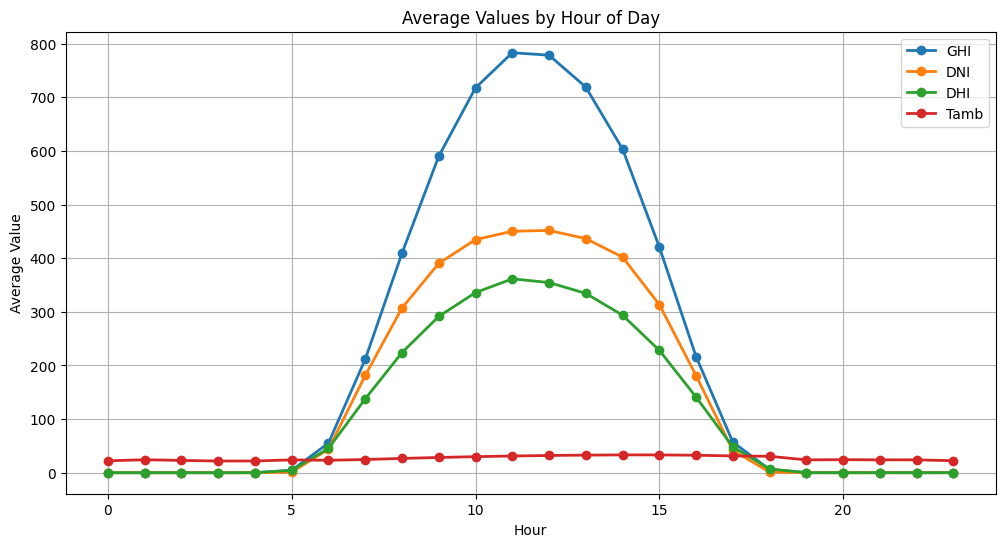

In [25]:
hourly_avg = df_clean.resample('H')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.groupby(hourly_avg.index.hour).mean().plot(figsize=(12,6), marker='o', linewidth=2)
plt.title("Average Values by Hour of Day")
plt.ylabel("Average Value")
plt.xlabel("Hour")
plt.grid(True)
plt.show();

##### anomalies, such as peaks in solar irradiance or temperature fluctuations.
“Anomalies, such as peaks in solar irradiance or temperature fluctuations” — Explained
When we talk about anomalies in your dataset, we mean data points that behave very differently from the normal pattern.
They can be caused by natural variations, sensor errors, shading events, or atmospheric changes.
Example:
On a clear day, GHI is usually around 900 W/m² at noon.
If one reading suddenly shows 1500 W/m², that’s an anomalous peak.

Detected 100 anomalies (extreme peaks or drops).


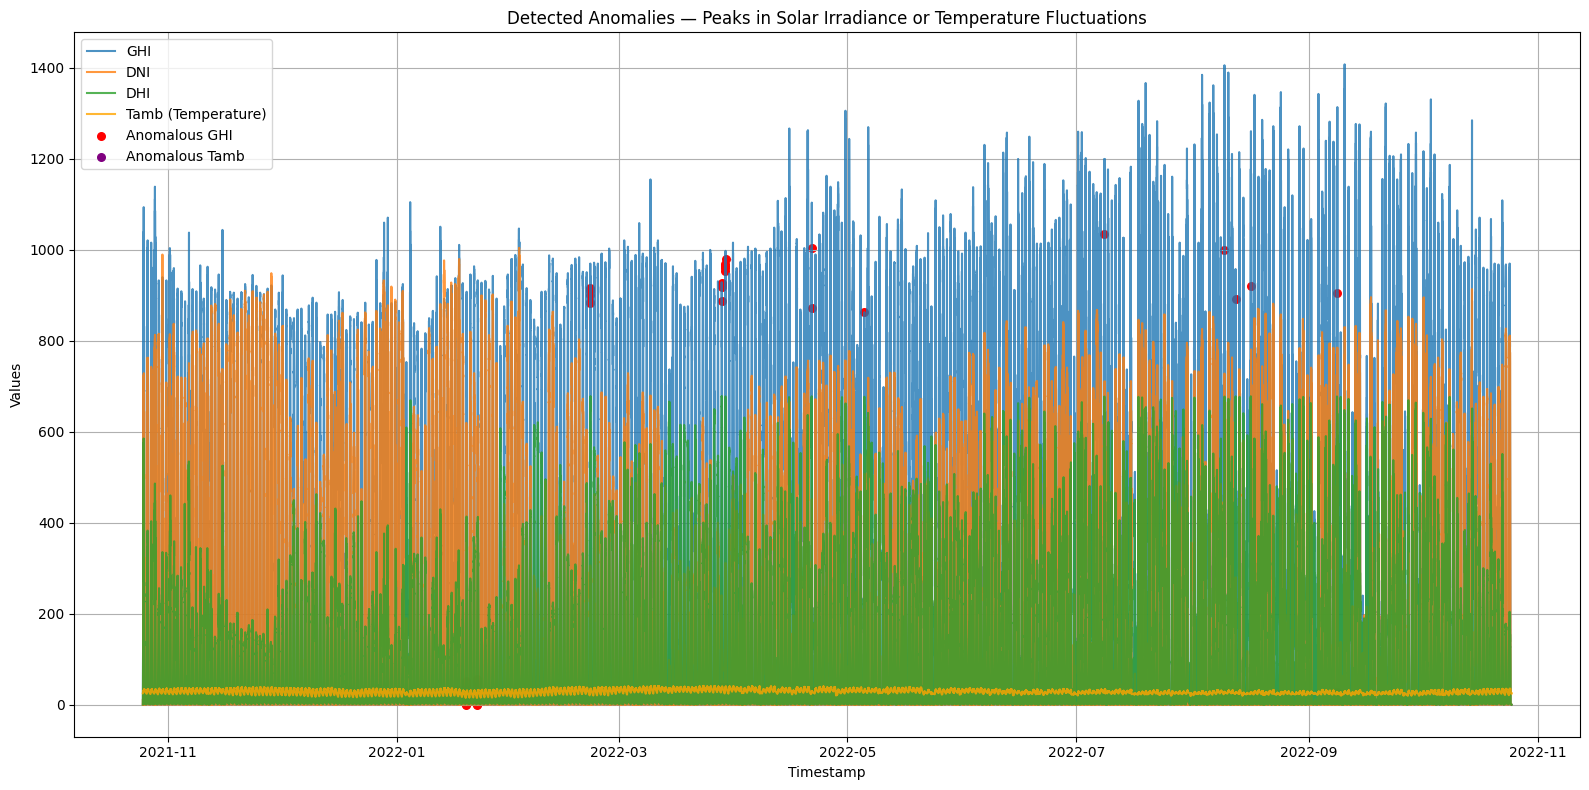

In [26]:
# --- Detect anomalies in solar irradiance and temperature ---
# Compute z-scores for each variable to detect peaks or unusual drops
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    df_clean[f'{col}_zscore'] = zscore(df_clean[col].dropna())
    
# Define anomalies where |z| > 3 (extreme deviations)
anomalies = df_clean[(df_clean['GHI_zscore'].abs() > 3) |
               (df_clean['DNI_zscore'].abs() > 3) |
               (df_clean['DHI_zscore'].abs() > 3) |
               (df_clean['Tamb_zscore'].abs() > 3)]

print(f"Detected {len(anomalies)} anomalies (extreme peaks or drops).")

# --- Plot anomalies for visual inspection ---
plt.figure(figsize=(16,8))
plt.plot(df_clean.index, df_clean['GHI'], label='GHI', alpha=0.8)
plt.plot(df_clean.index, df_clean['DNI'], label='DNI', alpha=0.8)
plt.plot(df_clean.index, df_clean['DHI'], label='DHI', alpha=0.8)
plt.plot(df_clean.index, df_clean['Tamb'], label='Tamb (Temperature)', alpha=0.8, color='orange')

# Highlight detected anomalies
plt.scatter(anomalies.index, anomalies['GHI'], color='red', label='Anomalous GHI', s=30)
plt.scatter(anomalies.index, anomalies['Tamb'], color='purple', label='Anomalous Tamb', s=30)

plt.title("Detected Anomalies — Peaks in Solar Irradiance or Temperature Fluctuations")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [27]:
df2 = pd.read_csv("../data/togo-dapaong_qc.csv")

## Cleaning Impact

**df2** → your pre-clean data.

**df_clean** → your post-clean data
I’ll update all code and the explanation accordingly.
This version will clearly show how ModA and ModB improved after cleaning by grouping on the "Cleaning flag". 

**Compare ModA & ModB Before vs After Cleaning**

In [29]:
##Step 1 — Label datasets. Mark each dataset with its cleaning stage:
df2['Stage'] = 'Pre-Clean'
df_clean['Stage'] = 'Post-Clean'

In [30]:
# Step 2 — Combine the two datasets Combine them into one DataFrame for comparison:
combined_df = pd.concat([df2, df_clean], axis=0)

In [31]:
# Step 3 — Group by Cleaning flag and Stage Compute the average ModA and ModB values for each cleaning flag and stage:
avg_mods = (
    combined_df
    .groupby(['Cleaning', 'Stage'])[['ModA', 'ModB']]
    .mean()
    .reset_index()
)

print(avg_mods.head())

   Cleaning       Stage        ModA        ModB
0         0  Post-Clean  442.872456  429.986238
1         0   Pre-Clean  225.979064  219.401351
2         1  Post-Clean  534.347857  531.438214
3         1   Pre-Clean  535.186477  532.211744


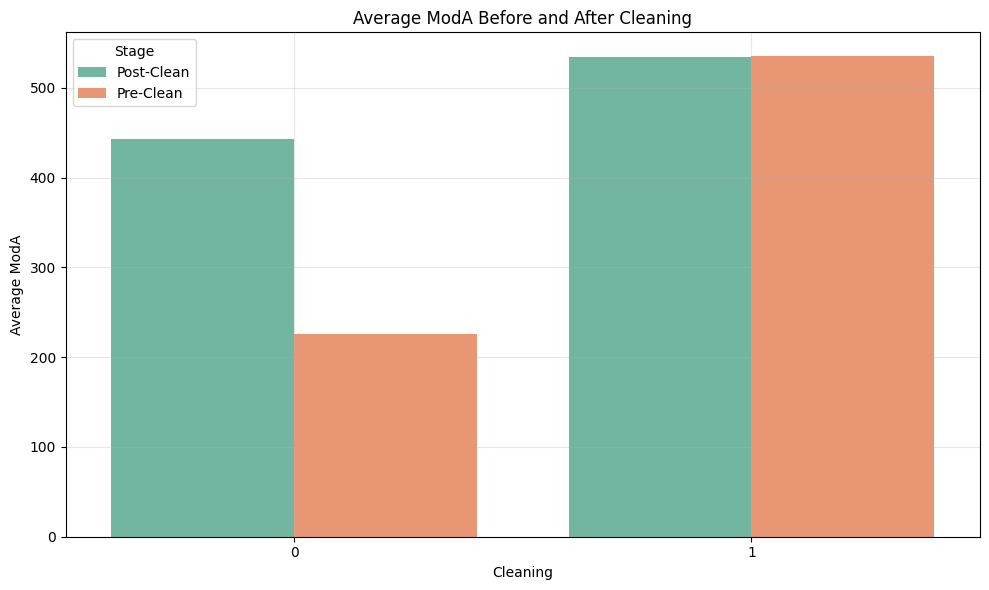

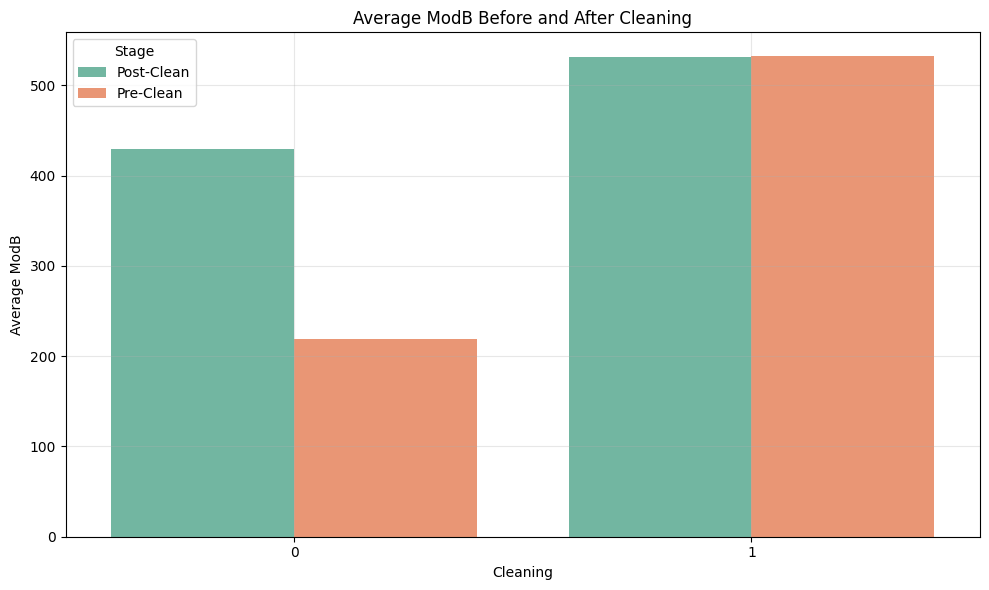

In [32]:
# Step 4 — Plot the comparison (side-by-side bars) Plot average ModA and ModB values for pre-clean vs post-clean:
# Plot ModA
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_mods,
    x='Cleaning', y='ModA', hue='Stage',
    palette='Set2'
)
plt.title("Average ModA Before and After Cleaning")
plt.xlabel("Cleaning")
plt.ylabel("Average ModA")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot ModB
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_mods,
    x='Cleaning', y='ModB', hue='Stage',
    palette='Set2'
)
plt.title("Average ModB Before and After Cleaning")
plt.xlabel("Cleaning")
plt.ylabel("Average ModB")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

#####  Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

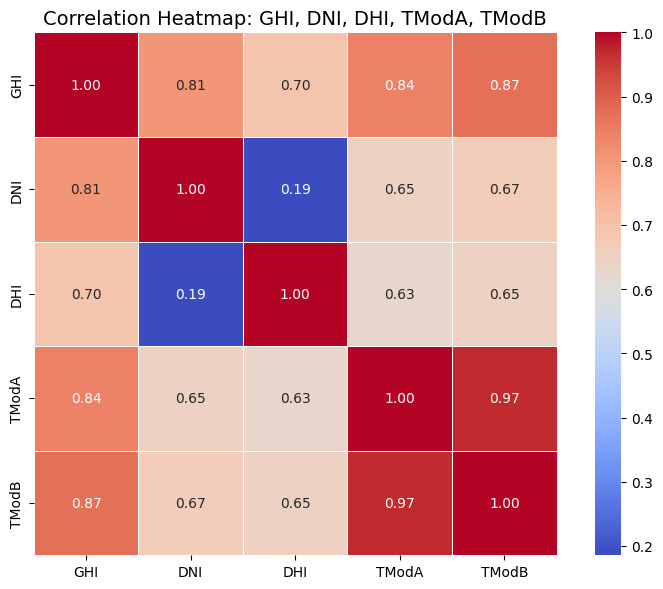

In [33]:
# Select only the relevant columns
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute the correlation matrix
corr_matrix = df_clean[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB", fontsize=14)
plt.tight_layout()
plt.show()

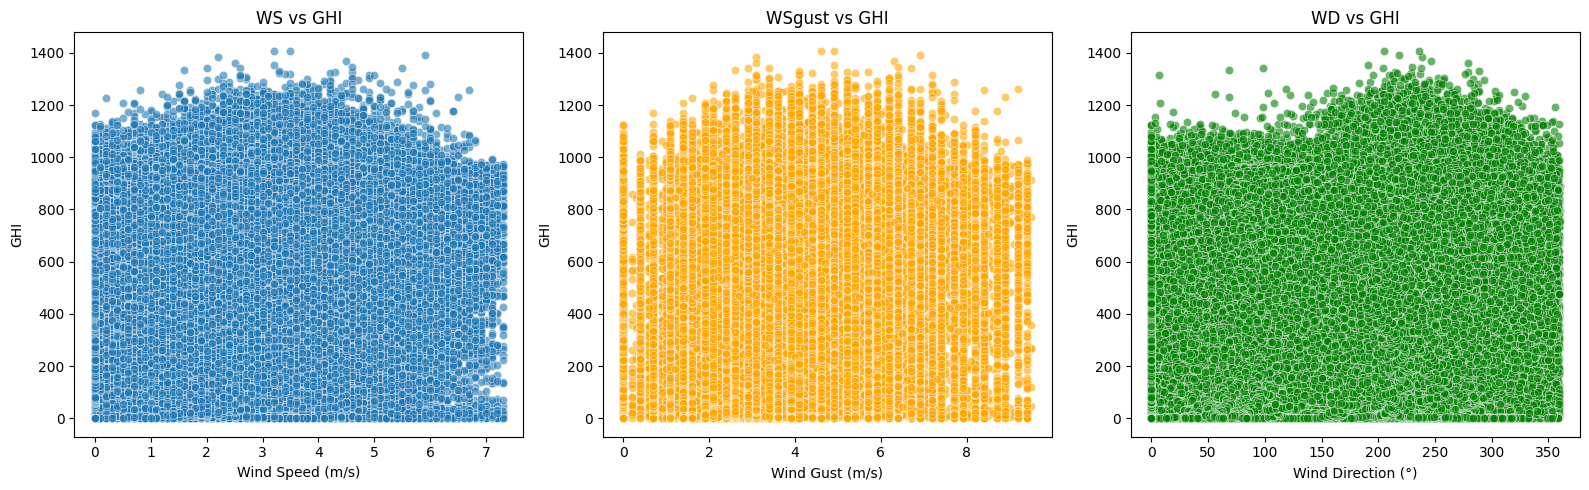

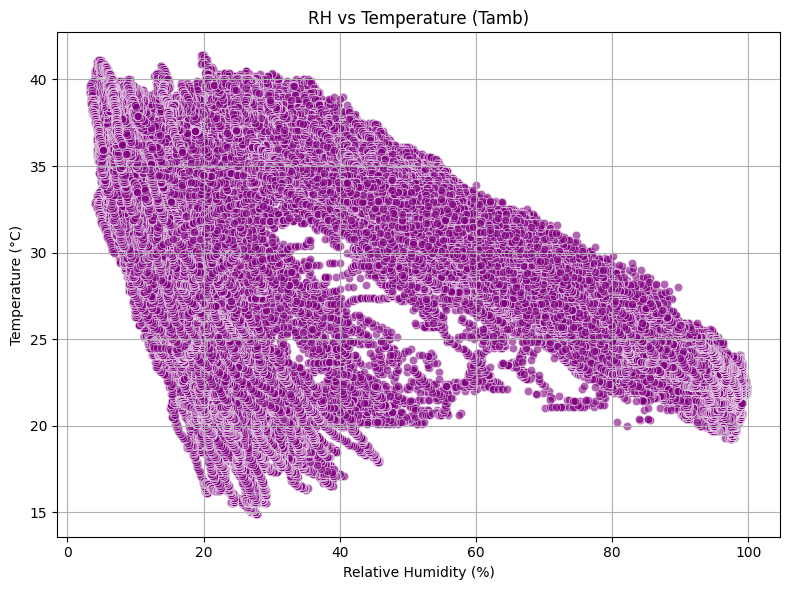

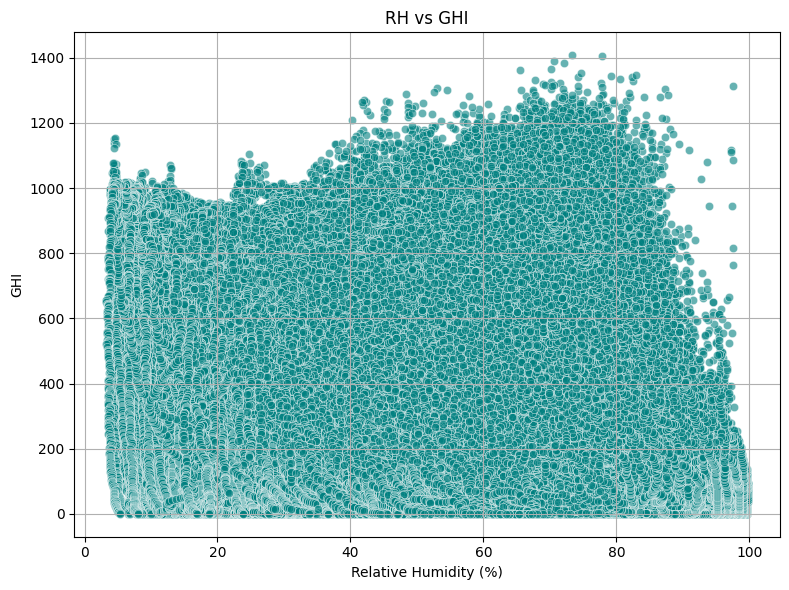

In [34]:
# --- 1) WS, WSgust, WD vs GHI ---
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_clean, x='WS', y='GHI', alpha=0.6)
plt.title("WS vs GHI")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI")

plt.subplot(1,3,2)
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', alpha=0.6, color='orange')
plt.title("WSgust vs GHI")
plt.xlabel("Wind Gust (m/s)")
plt.ylabel("GHI")

plt.subplot(1,3,3)
sns.scatterplot(data=df_clean, x='WD', y='GHI', alpha=0.6, color='green')
plt.title("WD vs GHI")
plt.xlabel("Wind Direction (°)")
plt.ylabel("GHI")

plt.tight_layout()
plt.show()

# --- 2) RH vs Tamb ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.6, color='purple')
plt.title("RH vs Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3) RH vs GHI ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.6, color='teal')
plt.title("RH vs GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI")
plt.grid(True)
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis
##### Wind rose or radial bar plot of WS/WD.

<Figure size 800x800 with 0 Axes>

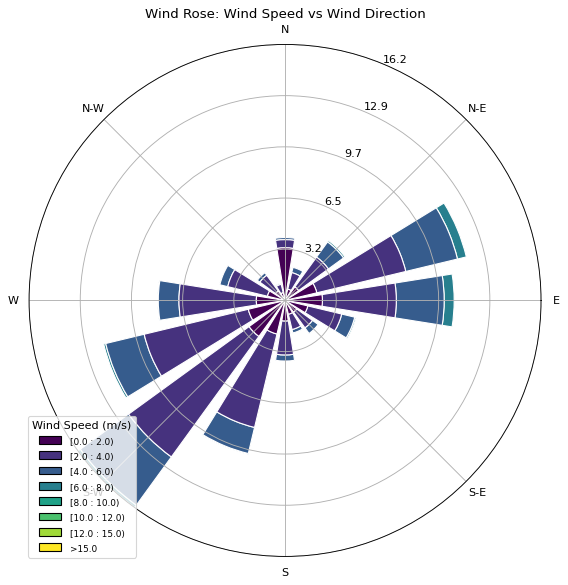

In [35]:
# Extract wind speed and direction
ws = df_clean['WS']
wd = df_clean['WD']

# Create a figure
plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins=[0, 2, 4, 6, 8, 10, 12, 15])
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show();

#####  Histograms for GHI and one other variable (e.g., WS).

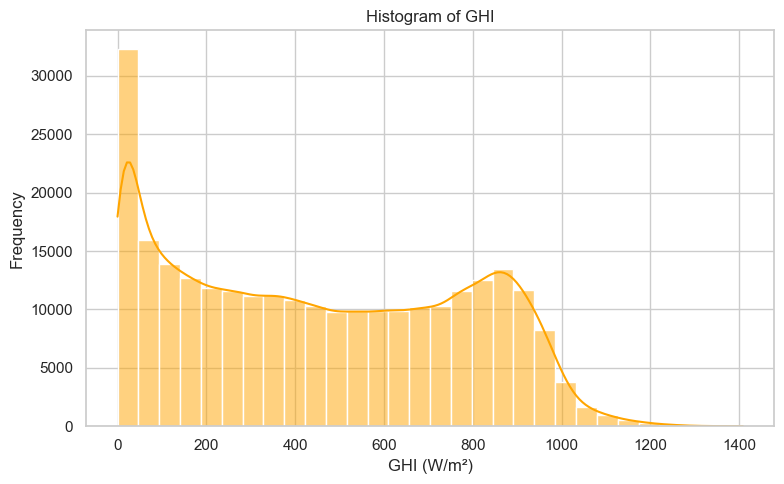

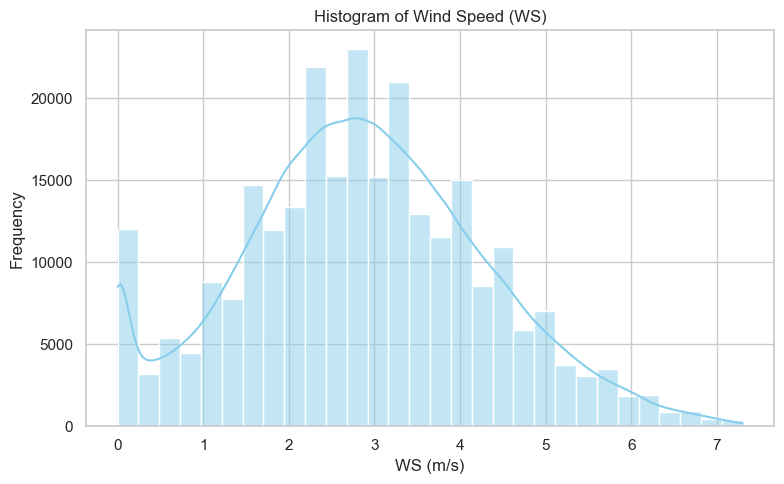

In [36]:
sns.set(style="whitegrid")

# --- Histogram for GHI ---
plt.figure(figsize=(8,5))
sns.histplot(df_clean['GHI'], bins=30, kde=True, color='orange')
plt.title("Histogram of GHI")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Histogram for WS ---
plt.figure(figsize=(8,5))
sns.histplot(df_clean['WS'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Wind Speed (WS)")
plt.xlabel("WS (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

## Temperature Analysis
##### Examine how relative humidity (RH) might influence temperature readings and solar radiation.

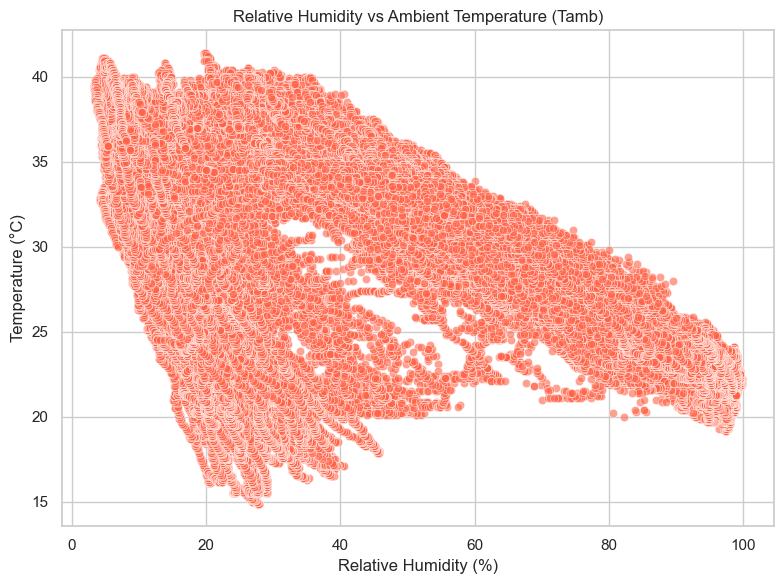

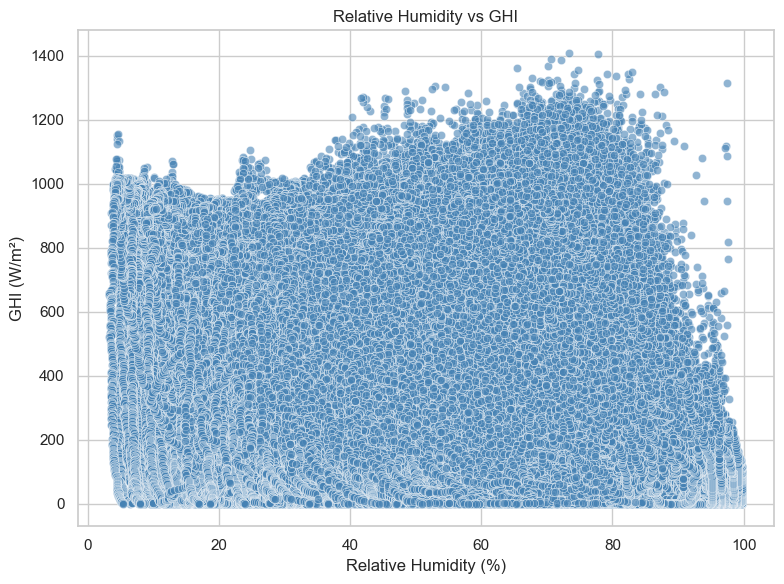

In [37]:
sns.set(style="whitegrid")

# RH vs Temperature (Tamb)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.6, color='tomato')
plt.title("Relative Humidity vs Ambient Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# RH vs GHI (Global Horizontal Irradiance)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.6, color='steelblue')
plt.title("Relative Humidity vs GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Correlation Coefficients

In [38]:
# Select variables
temp_vars = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']

# Compute correlation matrix
corr_matrix = df_clean[temp_vars].corr()
corr_matrix

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.572120 -0.318201 -0.431359 -0.102628
Tamb -0.572120  1.000000  0.470918  0.405348  0.317551
GHI  -0.318201  0.470918  1.000000  0.805789  0.695117
DNI  -0.431359  0.405348  0.805789  1.000000  0.185470
DHI  -0.102628  0.317551  0.695117  0.185470  1.000000

## Bubble Chart


##### GHI vs. Tamb with bubble size = RH or BP.
#### Bubble Chart: GHI vs Tamb with RH as Bubble Size

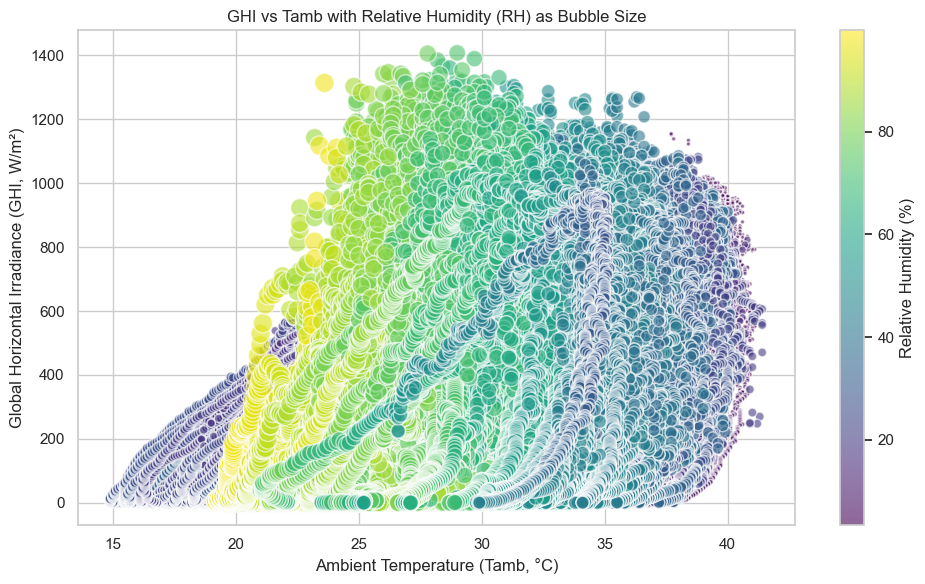

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Bubble chart
plt.scatter(
    x=df_clean['Tamb'], 
    y=df_clean['GHI'],
    s=df_clean['RH']*2,  # Bubble size (scaled)
    alpha=0.6,
    c=df_clean['RH'],    # Bubble color by RH
    cmap='viridis',
    edgecolors='w'
)

plt.xlabel("Ambient Temperature (Tamb, °C)")
plt.ylabel("Global Horizontal Irradiance (GHI, W/m²)")
plt.title("GHI vs Tamb with Relative Humidity (RH) as Bubble Size")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Optional: Bubble Chart using BP (Barometric Pressure) instead of RH

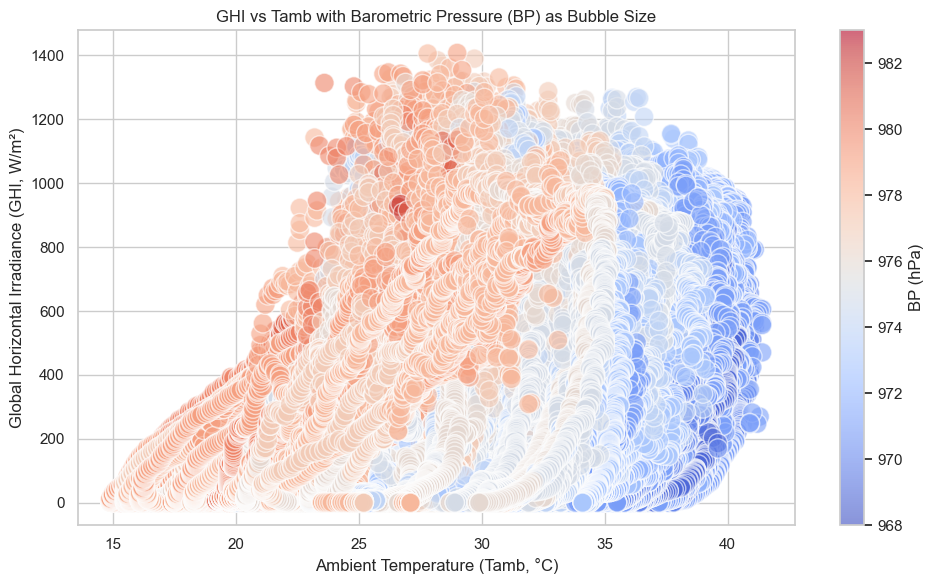

In [40]:
plt.figure(figsize=(10,6))

plt.scatter(
    x=df_clean['Tamb'], 
    y=df_clean['GHI'],
    s=df_clean['BP']/5,  # Bubble size (scaled)
    alpha=0.6,
    c=df_clean['BP'],    # Bubble color by BP
    cmap='coolwarm',
    edgecolors='w'
)

plt.xlabel("Ambient Temperature (Tamb, °C)")
plt.ylabel("Global Horizontal Irradiance (GHI, W/m²)")
plt.title("GHI vs Tamb with Barometric Pressure (BP) as Bubble Size")
cbar = plt.colorbar()
cbar.set_label("BP (hPa)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔹 Explanation

- **X-axis:** Ambient Temperature (`Tamb`)  
- **Y-axis:** Solar Radiation (`GHI`)  
- **Bubble size (`s`):** Relative Humidity (`RH`) or Barometric Pressure (`BP`)  
- **Bubble color (`c`):** Optional, adds another visual dimension  
- **`alpha=0.6`** → makes bubbles semi-transparent for better visibility  
- **`edgecolors='w'`** → white borders make bubbles easier to distinguish  

---

### 🔹 Insights You Can Get

- Observe how **GHI changes with temperature**.  
- Identify if **high RH or BP coincides with lower or higher GHI**.  
- Spot **clusters, anomalies, or trends** in the dataset.